# **Step 1: Stock Price Analysis and Prediction**


# **Step 1.1: Importing Required Libraries for numerical analysis and prediction of stock prices**

Technical Stack used : 
* Numpy Array
* Matplotlib
* Pandas
* Keras
* Scikit Learn
* Math

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn import metrics 
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math
import yfinance as yf

In [2]:
quote='JETAIRWAYS.NS'

In [3]:
def get_historical(quote):
    end = datetime(2023,12,30)
    start = datetime(2005,1,2)
    data = yf.download(quote, start=start, end=end)
    df = pd.DataFrame(data=data)
    df.to_csv(''+quote+'.csv')
    if(df.empty):
        ts = TimeSeries(key='N6A6QT6IBFJOPJ70',output_format='pandas')
        data, meta_data = ts.get_daily_adjusted(symbol='NSE:'+quote, outputsize='full')
        #Format df
        #Last 2 yrs rows => 502, in ascending order => ::-1
        data=data.head(503).iloc[::-1]
        data=data.reset_index()
        #Keep Required cols only
        df=pd.DataFrame()
        df['Date']=data['date']
        df['Open']=data['1. open']
        df['High']=data['2. high']
        df['Low']=data['3. low']
        df['Close']=data['4. close']
        df['Adj Close']=data['5. adjusted close']
        df['Volume']=data['6. volume']
        df.to_csv(''+quote+'.csv',index=False)
    return

In [4]:
%pip install datetime

Note: you may need to restart the kernel to use updated packages.


In [5]:
import datetime

In [6]:
end = datetime.datetime(2023,12,30)
start = datetime.datetime(2005,1,2)

In [7]:
def get_historical(quote):
    start = datetime.datetime(2005, 1, 2)
    end = datetime.datetime(2023, 12, 30)
    data = yf.download(quote, start=start, end=end)
    
    if not data.empty:
        data.to_csv(f'{quote}.csv')
        print(f"Data saved to {quote}.csv")
    else:
        print("Failed to retrieve data for:", quote)

In [8]:
get_historical(quote)


[*********************100%%**********************]  1 of 1 completed

Data saved to JETAIRWAYS.NS.csv


# **Step 1.3 : Creating a dataframe for storing the Closing stock data per day**

In [9]:
# convert an array of values into a dataset matrix
def create_dataset(df2, look_back=1):
    dataX, dataY = [], []
    for i in range(len(df2) - look_back - 1):
        a = df2[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(df2[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [10]:
df2 = pd.read_csv(f'{quote}.csv', usecols=['Adj Close'], engine='python')
df2.dropna(inplace=True)
df2 = df2.values
df2 = df2.astype('float32')

# **Step 1.4: Data Normalization and Division into Training and Test sets**

In [11]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
df2 = scaler.fit_transform(df2)

# split into train and test sets
train_size = int(len(df2) * 0.67)
test_size = len(df2) - train_size
train, test = df2[0:train_size,:], df2[train_size:len(df2),:]

In [12]:
# reshape into X=t and Y=t+1
look_back = 2
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

# **Step 1.5 : Creating a LSTM Neural Network Model for Numerical Analysis**

In [13]:
# create and fit the LSTM networkworkbench.action.openLargeOutput
model = Sequential()
model.add(LSTM(7, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=5, verbose=2)

Epoch 1/100
621/621 - 1s - loss: 0.0181 - 698ms/epoch - 1ms/step
Epoch 2/100
621/621 - 0s - loss: 2.9183e-04 - 218ms/epoch - 350us/step
Epoch 3/100
621/621 - 0s - loss: 2.4179e-04 - 218ms/epoch - 350us/step
Epoch 4/100
621/621 - 0s - loss: 2.3086e-04 - 218ms/epoch - 351us/step
Epoch 5/100
621/621 - 0s - loss: 2.2755e-04 - 216ms/epoch - 348us/step
Epoch 6/100
621/621 - 0s - loss: 2.2943e-04 - 219ms/epoch - 353us/step
Epoch 7/100
621/621 - 0s - loss: 2.2103e-04 - 214ms/epoch - 345us/step
Epoch 8/100
621/621 - 0s - loss: 2.2966e-04 - 221ms/epoch - 356us/step
Epoch 9/100
621/621 - 0s - loss: 2.2280e-04 - 217ms/epoch - 349us/step
Epoch 10/100
621/621 - 0s - loss: 2.2393e-04 - 239ms/epoch - 385us/step
Epoch 11/100
621/621 - 0s - loss: 2.2654e-04 - 222ms/epoch - 358us/step
Epoch 12/100
621/621 - 0s - loss: 2.1950e-04 - 220ms/epoch - 354us/step
Epoch 13/100
621/621 - 0s - loss: 2.1866e-04 - 218ms/epoch - 351us/step
Epoch 14/100
621/621 - 0s - loss: 2.2340e-04 - 243ms/epoch - 392us/step
Epoch 1

# **Step 1.6 : Making Predictions of the Model**

In [14]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

48/48 [==============================] - 0s 277us/step


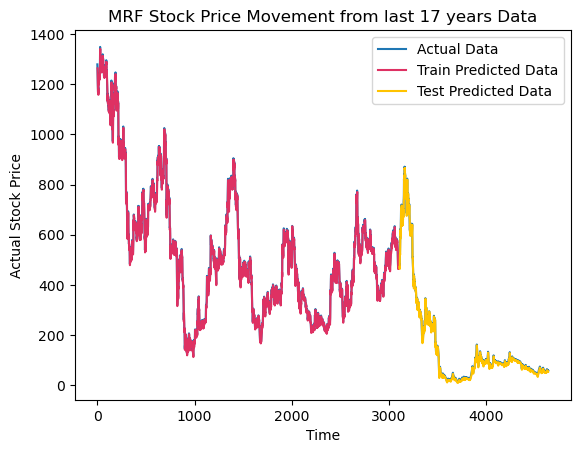

In [15]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(df2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df2)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df2)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df2), label = 'Actual Data')
plt.title('MRF Stock Price Movement from last 17 years Data')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.plot(trainPredictPlot,color='#DE3163', label = 'Train Predicted Data')
plt.plot(testPredictPlot, color='#FFC300', label = 'Test Predicted Data')
plt.legend(loc='best')
plt.show()

In [17]:
# calculate root mean squared error(to access model performance and also compare test and train data)
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print("Root mean square error of Training  = ",trainScore," RMSE")
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print("Root mean square error of Testing = ",testScore," RMSE")


Root mean square error of Training  =  16.93425602029132  RMSE
Root mean square error of Testing =  9.467267832535365  RMSE


# **Step 2: Textual Data(News Headlines) Analysis**

# **Step 2.1:  Importing Required Libraries for Textual (News Headlines) analysis**

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
from datetime import datetime

In [19]:
%pip install textblob

Note: you may need to restart the kernel to use updated packages.


# **Step 2.2 : Importing the Textual dataset and performing Exploratory Analysis**

In [20]:
data = pd.read_csv('stock_newsss.csv')
data.head()

,publish_date,headline_category,headline_text
0,0,Negative,"Markets Close Mostly Lower Again; ROST, PANW R..."
1,1,Negative,"Gap plummets on earnings miss, cuts full-year ..."
2,2,Negative,Billionaire Ken Fisher is Selling These 10 Stocks
3,3,Negative,"Corning net income drops 13%, shares fall"
4,4,Negative,Internet Explorer shutdown to cause Japan prob...


In [21]:
data['publish_date'].duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
25995    False
25996    False
25997    False
25998    False
25999    False
Name: publish_date, Length: 26000, dtype: bool

In [22]:
data = data.drop_duplicates('publish_date', keep='first').sort_index()
data= data.reset_index()

In [23]:
data.rename(columns={'publish_date': 'Date'},inplace = True)
data.head()

,index,Date,headline_category,headline_text
0,0,0,Negative,"Markets Close Mostly Lower Again; ROST, PANW R..."
1,1,1,Negative,"Gap plummets on earnings miss, cuts full-year ..."
2,2,2,Negative,Billionaire Ken Fisher is Selling These 10 Stocks
3,3,3,Negative,"Corning net income drops 13%, shares fall"
4,4,4,Negative,Internet Explorer shutdown to cause Japan prob...


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26000 entries, 0 to 25999
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   index              26000 non-null  int64 
 1   Date               26000 non-null  int64 
 2   headline_category  26000 non-null  object
 3   headline_text      26000 non-null  object
dtypes: int64(2), object(2)
memory usage: 812.6+ KB


In [25]:
data['headline_category'].value_counts()

headline_category
Positive    12448
Neutral      8748
Negative     4804
Name: count, dtype: int64

In [26]:
city_data = data[data['headline_category'].str.contains('^city\.[a-z]+$', regex=True)]
city_data

,index,Date,headline_category,headline_text


In [27]:
city_split = pd.DataFrame(columns=['city_name'])

In [49]:
city_split['city_name'] = city_data.headline_category.str.split('.',expand=True)[1]

AttributeError: 'DataFrame' object has no attribute 'headline_category'

In [50]:
# concate the data set city_data and city_split
city_data = pd.concat([city_data,city_split],axis=1)

In [51]:
# removing unnecessary column from dataset
city_data.drop(columns=['headline_category'],axis=1, inplace=True)

KeyError: "['headline_category'] not found in axis"

In [52]:
# re-setting the index
city_data.reset_index(inplace=True)

In [53]:
# see the final data which contain city_name column
city_data.head()

,index,level_0,headline_text,city_name,Year,city_name


In [54]:
city_data.drop(['level_0', 'index'],axis=1)

,headline_text,city_name,Year,city_name


In [55]:
# there are so many cities which we can see
city_data.city_name.unique()

AttributeError: 'DataFrame' object has no attribute 'unique'

# **Step 2.3: Representing number of headline text (News Headline) per city**

In [56]:
# create a group of cities and let's see which city have, how many no. of headine text
city_headline = city_data.groupby(['city_name']).agg({'headline_text':'count'})

ValueError: Grouper for 'city_name' not 1-dimensional

In [57]:
#for better understanding remane the column
city_headline.rename(columns={'headline_text':'Number_of_headline_text'},inplace=True)

In [58]:
# finding the top 15 cities which have high number of headlines text
city_headline = city_headline.sort_values(by='Number_of_headline_text',ascending=False)
top_15_headline_city = city_headline.head(15)
top_15_headline_city

,Number_of_headline_text
city_name,


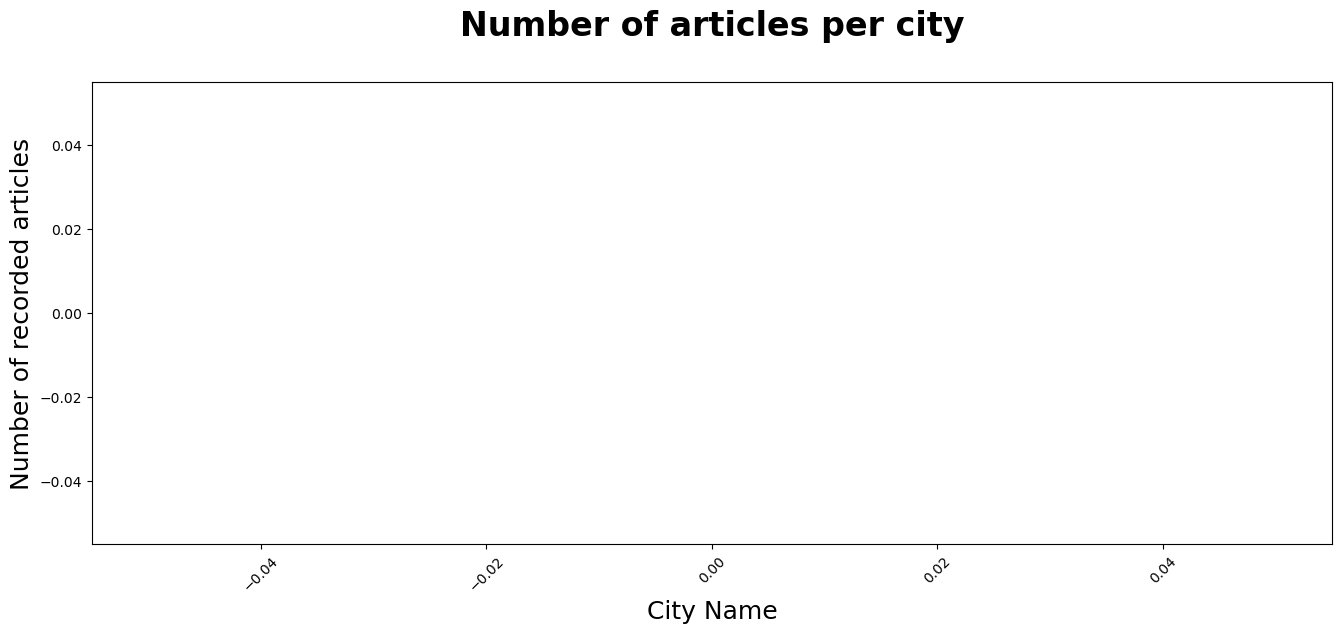

In [59]:
# plotting a graph for better understanding for top 15 cities which have high no. of headline text

plt.figure(figsize=(16,6))
plt.bar(top_15_headline_city.index,height=top_15_headline_city['Number_of_headline_text'])
plt.xticks(rotation = 45)
plt.xlabel('City Name',fontsize=18)
plt.ylabel('Number of recorded articles',fontsize=18)
plt.title('Number of articles per city\n',fontsize=24, fontweight='bold')
plt.show()

# **Step 2.4: Representing Number of News Headlines per year and per city**

In [60]:
city_data['Date'] = pd.to_datetime(city_data['Date'])
city_data.head()

KeyError: 'Date'

In [ ]:
city_data['Year'] = city_data['Date'].apply(lambda x: (x.year))

In [ ]:
# dropping unnecessary columns
city_data.drop(columns=['Date','index'],axis=1,inplace=True)

In [61]:
# final result
city_data.head()

,index,level_0,headline_text,city_name,Year,city_name


In [62]:
city_data_2 = city_data.copy()
city_data_2['Number_of_headline_text'] = 1

In [63]:
# dropping unwanted column
city_data_2.drop(columns=['headline_text'],axis=1, inplace=True)

In [64]:
city_data_2.head()

,index,level_0,city_name,Year,city_name,Number_of_headline_text


In [65]:
top_15_headline_city.head(7)

,Number_of_headline_text
city_name,


In [66]:
# creating new data_set for top 7 cities with year 

city_beng = city_data_2[city_data_2.city_name == 'bengaluru']
city_del = city_data_2[city_data_2.city_name == 'delhi']
city_ahme = city_data_2[city_data_2.city_name == 'ahmedabad']
city_mum = city_data_2[city_data_2.city_name == 'mumbai']
city_pune = city_data_2[city_data_2.city_name == 'pune']
city_hyd = city_data_2[city_data_2.city_name == 'hyderabad']
city_luck = city_data_2[city_data_2.city_name == 'luck']

ValueError: cannot reindex on an axis with duplicate labels

In [ ]:
famous_cities = [city_beng, city_del, city_ahme, city_mum, city_pune, city_hyd, city_luck]
data_famous_cities = pd.concat(famous_cities)

In [67]:
# reset index numbers
data_famous_cities.reset_index(inplace=True)

In [68]:
# top 7 cities
print(data_famous_cities.shape)
data_famous_cities.head()

(0, 5)


,index,level_0,city_name,Year,Number_of_headline_text


In [69]:
data_famous_cities=data_famous_cities.drop(['level_0'],axis=1)
data_famous_cities.head()

,index,city_name,Year,Number_of_headline_text


In [70]:
# year-wise no. of headlines text
city_year_count = pd.Series(city_data_2.groupby(['Year'])['Number_of_headline_text'].count())

# year-wise data which shows which city have how many no. of headline text
city_count = data_famous_cities.groupby(['Year', 'city_name']).sum()['Number_of_headline_text'].unstack()

In [71]:
city_count.head()

city_name
Year


In [408]:
city_year_count.head()

Series([], Name: Number_of_headline_text, dtype: int64)

IndexError: index 0 is out of bounds for axis 0 with size 0

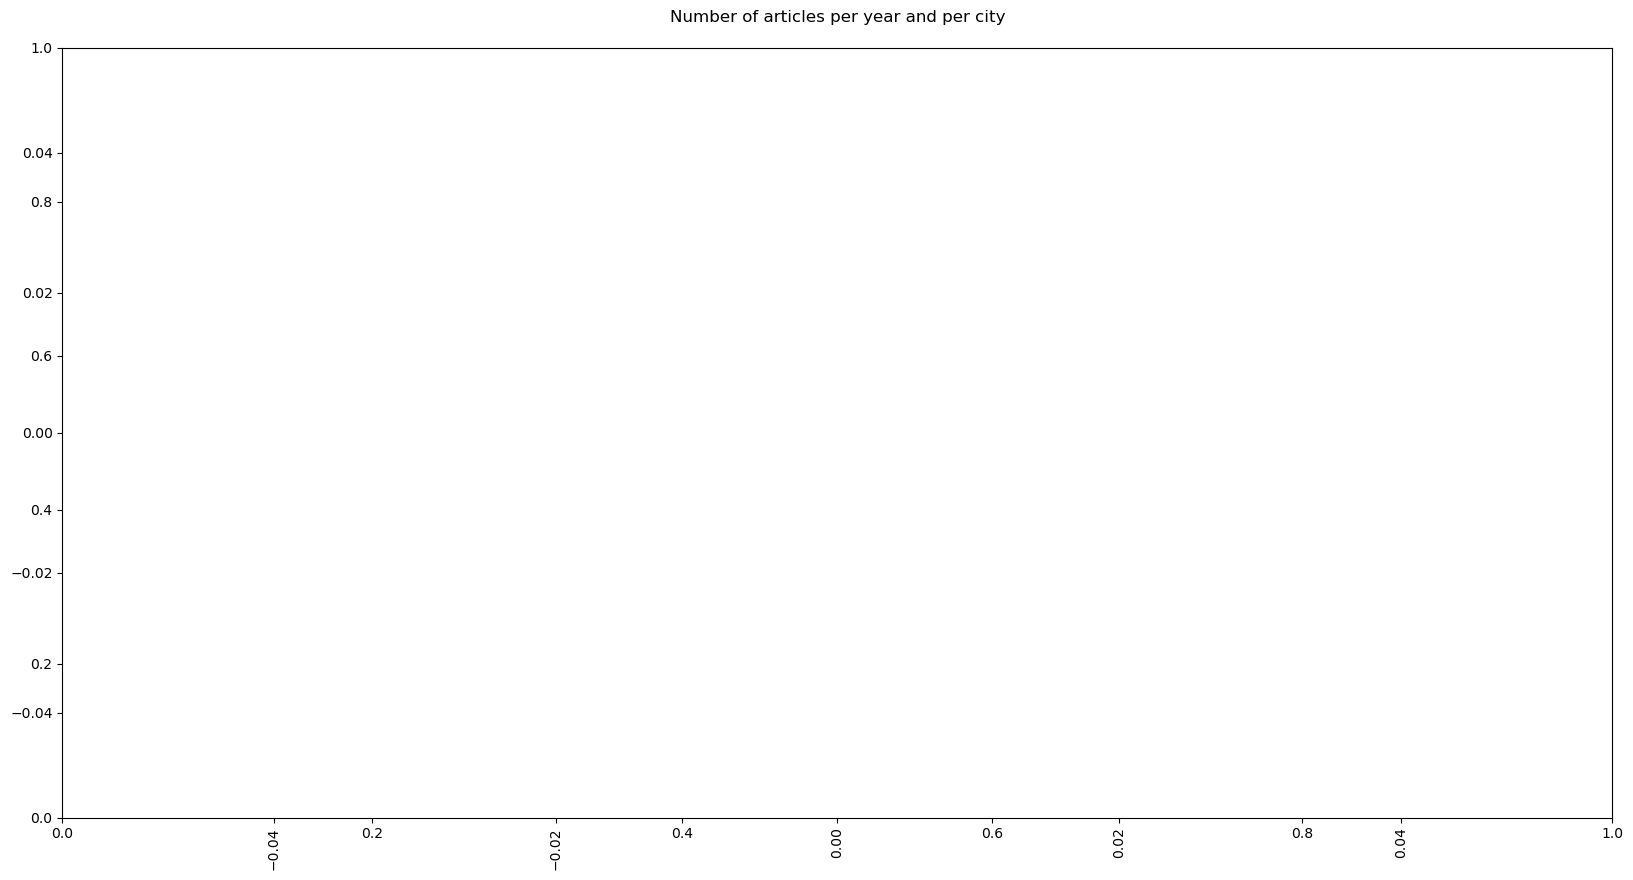

<Figure size 2000x1000 with 0 Axes>

In [409]:
fig=plt.figure()

a = fig.add_subplot(111,label="1")
b = fig.add_subplot(111,label="2", frame_on = False)

plt.figure(figsize=(20,10))
city_year_count.plot(kind='bar',figsize=(20,10), ax=a,title="Number of articles per year and per city\n")
a.set_ylabel('Number of Articles (Per city)')
a.set_xlabel("")

city_count.plot(ax=b)
b.set_xticks([])
b.set_ylabel('Number of Articles (Per city)', size =16)
b.yaxis.tick_right()
b.set_xlabel('Year') 

a.get_yaxis().set_label_coords(-.05,0.5)
b.get_yaxis().set_label_coords(1.05,0.5)
b.get_xaxis().set_label_coords(0.5, -0.07)

plt.show()

# **Step 2.5: Sentiment Analysis of News Headlines**

In [413]:
def getAnalysis_polarity(headline):
    result = TextBlob(headline)
    
    if result.sentiment.polarity < 0:
        return 'negative'
    elif result.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'positive'

In [414]:
data['Result'] = np.array([getAnalysis_polarity(headline) for headline in data['headline_text']])

In [415]:
final_result = data.groupby(['Result']).agg({'headline_text':'count'})
final_result

,headline_text
Result,
negative,2558
neutral,15646
positive,7796


In [416]:
negative = (final_result.loc['negative'] / len(data))*100
neutral = (final_result.loc['neutral'] / len(data))*100
positive = (final_result.loc['positive'] / len(data))*100


print('Positive Headlines: ' , positive )
print('\n\nNegative Headlines: ' ,negative )
print('\n\nUnbiased Headlines: ' , str(neutral))

Positive Headlines:  headline_text    29.984615
Name: positive, dtype: float64


Negative Headlines:  headline_text    9.838462
Name: negative, dtype: float64


Unbiased Headlines:  headline_text    60.176923
Name: neutral, dtype: float64


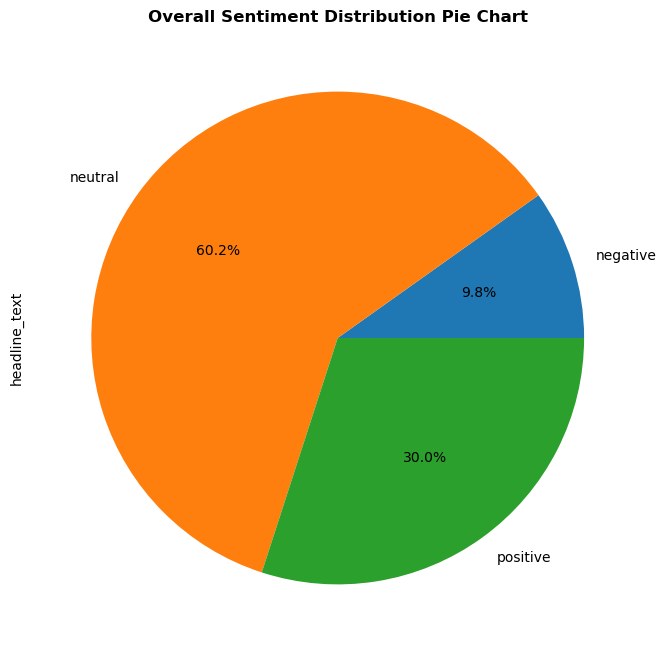

In [417]:
plt.figure(figsize=(8,8))
final_result['headline_text'].plot.pie(autopct='%1.1f%%')
plt.title("Overall Sentiment Distribution Pie Chart",fontweight="bold")
plt.show()

# **Step 3: Creating Hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines**

# **Step 3.1: Importing Required Libraries**

In [418]:
%pip install vaderSentiment
#provide sentimental analysis score

Note: you may need to restart the kernel to use updated packages.


In [419]:
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# **Step 3.2 : Importing the Numerical and Textual dataset**

In [420]:
stock_data=pd.read_csv('JETAIRWAYS.NS.csv')
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-03-14,1155.0,1338.900024,1155.000000,1304.199951,1279.098267,12791631
1,2005-03-15,1310.0,1311.699951,1280.000000,1293.349976,1268.457153,3701537
2,2005-03-16,1295.0,1300.949951,1275.550049,1282.599976,1257.913940,958818
3,2005-03-17,1280.0,1280.000000,1246.650024,1251.500000,1227.412598,839750
4,2005-03-18,1248.0,1251.500000,1219.150024,1229.400024,1205.737915,1389118


In [421]:
news_data=pd.read_csv('stock_newsss.csv')
news_data.head()

,publish_date,headline_category,headline_text
0,0,Negative,"Markets Close Mostly Lower Again; ROST, PANW R..."
1,1,Negative,"Gap plummets on earnings miss, cuts full-year ..."
2,2,Negative,Billionaire Ken Fisher is Selling These 10 Stocks
3,3,Negative,"Corning net income drops 13%, shares fall"
4,4,Negative,Internet Explorer shutdown to cause Japan prob...


In [422]:
news_data.rename(columns={'publish_date': 'Date'},inplace = True)
news_data.head()

,Date,headline_category,headline_text
0,0,Negative,"Markets Close Mostly Lower Again; ROST, PANW R..."
1,1,Negative,"Gap plummets on earnings miss, cuts full-year ..."
2,2,Negative,Billionaire Ken Fisher is Selling These 10 Stocks
3,3,Negative,"Corning net income drops 13%, shares fall"
4,4,Negative,Internet Explorer shutdown to cause Japan prob...


# **Step 3.3: Creating Hybrid data from Numerical and Textual Data**

In [423]:
#Index of each DataFrame should be used for the merge operation.
hybrid_data = pd.merge(stock_data, news_data, left_index=True, right_index=True, how='inner')


In [424]:
hybrid_data.head()

,Date_x,Open,High,Low,Close,Adj Close,Volume,Date_y,headline_category,headline_text
0,2005-03-14,1155.0,1338.900024,1155.000000,1304.199951,1279.098267,12791631,0,Negative,"Markets Close Mostly Lower Again; ROST, PANW R..."
1,2005-03-15,1310.0,1311.699951,1280.000000,1293.349976,1268.457153,3701537,1,Negative,"Gap plummets on earnings miss, cuts full-year ..."
2,2005-03-16,1295.0,1300.949951,1275.550049,1282.599976,1257.913940,958818,2,Negative,Billionaire Ken Fisher is Selling These 10 Stocks
3,2005-03-17,1280.0,1280.000000,1246.650024,1251.500000,1227.412598,839750,3,Negative,"Corning net income drops 13%, shares fall"
4,2005-03-18,1248.0,1251.500000,1219.150024,1229.400024,1205.737915,1389118,4,Negative,Internet Explorer shutdown to cause Japan prob...


# **Step 3.4: Performing Sentiment Analysis on Hybrid Data**

## **Step 3.4.1: Sentiment Analysis using TextBlob**

In [425]:
def analysis_polarity(headline):
    result = TextBlob(headline)
    
    if result.sentiment.polarity < 0:
        return 'negative'
    elif result.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'positive'

In [426]:
hybrid_data['sentiment'] = np.array([analysis_polarity(headline) for headline in hybrid_data['headline_text']])
hybrid_data.head()

,Date_x,Open,High,Low,Close,Adj Close,Volume,Date_y,headline_category,headline_text,sentiment
0,2005-03-14,1155.0,1338.900024,1155.000000,1304.199951,1279.098267,12791631,0,Negative,"Markets Close Mostly Lower Again; ROST, PANW R...",positive
1,2005-03-15,1310.0,1311.699951,1280.000000,1293.349976,1268.457153,3701537,1,Negative,"Gap plummets on earnings miss, cuts full-year ...",neutral
2,2005-03-16,1295.0,1300.949951,1275.550049,1282.599976,1257.913940,958818,2,Negative,Billionaire Ken Fisher is Selling These 10 Stocks,neutral
3,2005-03-17,1280.0,1280.000000,1246.650024,1251.500000,1227.412598,839750,3,Negative,"Corning net income drops 13%, shares fall",neutral
4,2005-03-18,1248.0,1251.500000,1219.150024,1229.400024,1205.737915,1389118,4,Negative,Internet Explorer shutdown to cause Japan prob...,neutral


In [427]:
#MAKING TWO COLUMNS NEUTRAL AND POSITIVE AND IF ITS FALSE THEN ANOTHER FALSE COLUMNN IS ADDED
senti_data = pd.get_dummies(hybrid_data['sentiment'],drop_first=True)

In [428]:
hybrid_data = pd.concat([hybrid_data,senti_data],axis=1)

In [429]:
hybrid_data.head()

,Date_x,Open,High,Low,Close,Adj Close,Volume,Date_y,headline_category,headline_text,sentiment,neutral,positive
0,2005-03-14,1155.0,1338.900024,1155.000000,1304.199951,1279.098267,12791631,0,Negative,"Markets Close Mostly Lower Again; ROST, PANW R...",positive,False,True
1,2005-03-15,1310.0,1311.699951,1280.000000,1293.349976,1268.457153,3701537,1,Negative,"Gap plummets on earnings miss, cuts full-year ...",neutral,True,False
2,2005-03-16,1295.0,1300.949951,1275.550049,1282.599976,1257.913940,958818,2,Negative,Billionaire Ken Fisher is Selling These 10 Stocks,neutral,True,False
3,2005-03-17,1280.0,1280.000000,1246.650024,1251.500000,1227.412598,839750,3,Negative,"Corning net income drops 13%, shares fall",neutral,True,False
4,2005-03-18,1248.0,1251.500000,1219.150024,1229.400024,1205.737915,1389118,4,Negative,Internet Explorer shutdown to cause Japan prob...,neutral,True,False


## **Step 3.4.2: Adding subjectivity and polarity Scores to Textual Data (News Headlines)**

In [430]:
#Functions to get the subjectivity and polarity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return  TextBlob(text).sentiment.polarity

In [431]:
#Adding subjectivity and polarity columns
hybrid_data['Subjectivity'] =hybrid_data['headline_text'].apply(getSubjectivity)
hybrid_data['Polarity'] = hybrid_data['headline_text'].apply(getPolarity)
hybrid_data.head()

,Date_x,Open,High,Low,Close,Adj Close,Volume,Date_y,headline_category,headline_text,sentiment,neutral,positive,Subjectivity,Polarity
0,2005-03-14,1155.0,1338.900024,1155.000000,1304.199951,1279.098267,12791631,0,Negative,"Markets Close Mostly Lower Again; ROST, PANW R...",positive,False,True,0.5,0.5
1,2005-03-15,1310.0,1311.699951,1280.000000,1293.349976,1268.457153,3701537,1,Negative,"Gap plummets on earnings miss, cuts full-year ...",neutral,True,False,0.0,0.0
2,2005-03-16,1295.0,1300.949951,1275.550049,1282.599976,1257.913940,958818,2,Negative,Billionaire Ken Fisher is Selling These 10 Stocks,neutral,True,False,0.0,0.0
3,2005-03-17,1280.0,1280.000000,1246.650024,1251.500000,1227.412598,839750,3,Negative,"Corning net income drops 13%, shares fall",neutral,True,False,0.0,0.0
4,2005-03-18,1248.0,1251.500000,1219.150024,1229.400024,1205.737915,1389118,4,Negative,Internet Explorer shutdown to cause Japan prob...,neutral,True,False,0.0,0.0


## **Step 3.4.3: Visualizing the polarity and Subjectivity scores**


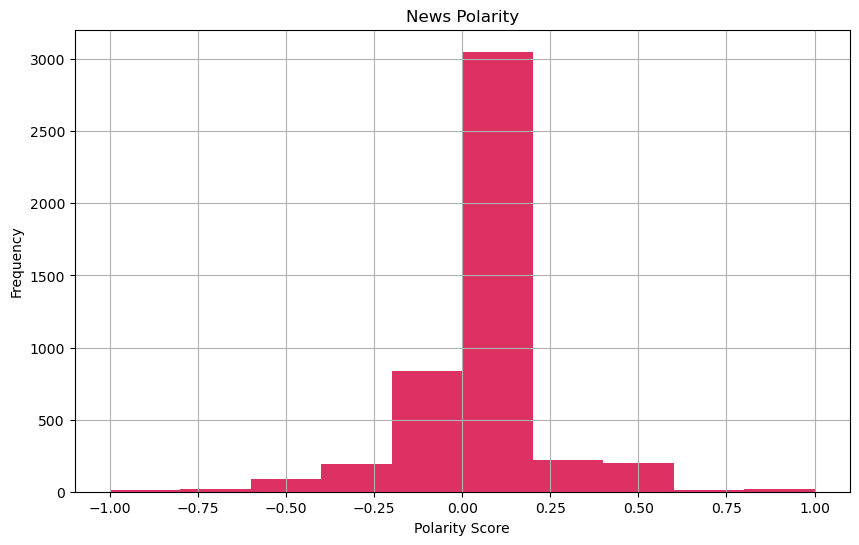

In [432]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.title('News Polarity')
plt.xlabel('Polarity Score')  # Label for the x-axis
plt.ylabel('Frequency')  # Label for the y-axis
hybrid_data['Polarity'].hist(color='#DE3163')
plt.show()


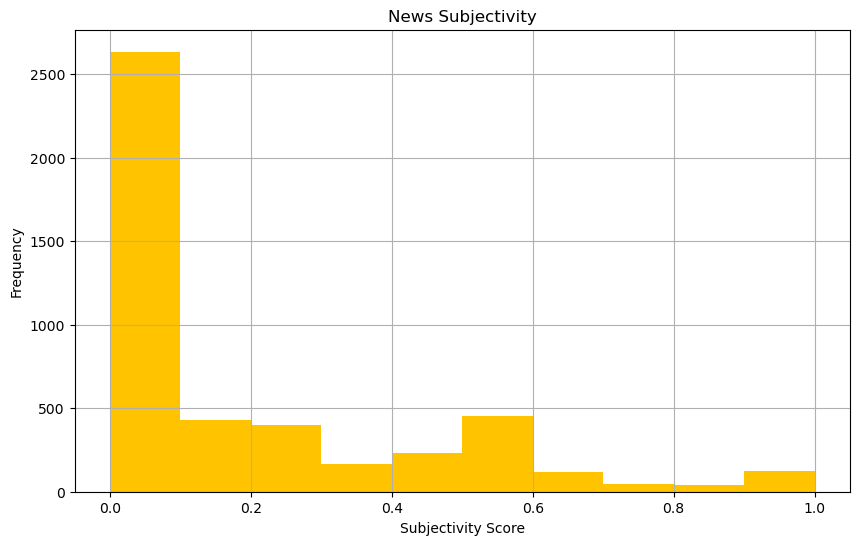

In [433]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.title('News Subjectivity')
plt.xlabel('Subjectivity Score')  # Label for the x-axis
plt.ylabel('Frequency')  # Label for the y-axis
hybrid_data['Subjectivity'].hist(color='#FFC300')
plt.show()


## **Step 3.4.4 : Performing Sentiment Analysis over the news Headlines of Hybrid Data**

In [434]:
#Adding sentiment score to news(to recheck the scores textblob use vedar)
senti_int_an = SentimentIntensityAnalyzer()

hybrid_data['Compound'] = [senti_int_an.polarity_scores(v)['compound'] for v in hybrid_data['headline_text']]
hybrid_data['Negative'] = [senti_int_an.polarity_scores(v)['neg'] for v in hybrid_data['headline_text']]
hybrid_data['Neutral'] = [senti_int_an.polarity_scores(v)['neu'] for v in hybrid_data['headline_text']]
hybrid_data['Positive'] = [senti_int_an.polarity_scores(v)['pos'] for v in hybrid_data['headline_text']]
hybrid_data.head()

,Date_x,Open,High,Low,Close,Adj Close,Volume,Date_y,headline_category,headline_text,sentiment,neutral,positive,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2005-03-14,1155.0,1338.900024,1155.000000,1304.199951,1279.098267,12791631,0,Negative,"Markets Close Mostly Lower Again; ROST, PANW R...",positive,False,True,0.5,0.5,-0.2960,0.216,0.784,0.000
1,2005-03-15,1310.0,1311.699951,1280.000000,1293.349976,1268.457153,3701537,1,Negative,"Gap plummets on earnings miss, cuts full-year ...",neutral,True,False,0.0,0.0,-0.4215,0.388,0.612,0.000
2,2005-03-16,1295.0,1300.949951,1275.550049,1282.599976,1257.913940,958818,2,Negative,Billionaire Ken Fisher is Selling These 10 Stocks,neutral,True,False,0.0,0.0,0.0000,0.000,1.000,0.000
3,2005-03-17,1280.0,1280.000000,1246.650024,1251.500000,1227.412598,839750,3,Negative,"Corning net income drops 13%, shares fall",neutral,True,False,0.0,0.0,0.2960,0.000,0.732,0.268
4,2005-03-18,1248.0,1251.500000,1219.150024,1229.400024,1205.737915,1389118,4,Negative,Internet Explorer shutdown to cause Japan prob...,neutral,True,False,0.0,0.0,-0.4019,0.252,0.748,0.000


In [435]:
hybrid_data.columns

Index(['Date_x', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Date_y', 'headline_category', 'headline_text', 'sentiment', 'neutral',
       'positive', 'Subjectivity', 'Polarity', 'Compound', 'Negative',
       'Neutral', 'Positive'],
      dtype='object')

In [436]:
req_col = [ 'Open',  'High', 'Low','Volume','Compound', 'Negative', 'Neutral' ,'Positive','positive']

In [437]:
new_hybrid = hybrid_data[req_col]
new_hybrid.reset_index(inplace = True)

In [438]:
# Rename the 'positive' column to 'Label' in the DataFrame for clarity
new_hybrid.rename(columns = {'positive':'Label'}, inplace = True)

/var/folders/2f/npyyptj56ld25y5frhh1q5gc0000gn/T/ipykernel_84553/2625432084.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_hybrid.rename(columns = {'positive':'Label'}, inplace = True)


In [439]:
new_hybrid.head()

,index,Open,High,Low,Volume,Compound,Negative,Neutral,Positive,Label
0,0,1155.0,1338.900024,1155.000000,12791631,-0.2960,0.216,0.784,0.000,True
1,1,1310.0,1311.699951,1280.000000,3701537,-0.4215,0.388,0.612,0.000,False
2,2,1295.0,1300.949951,1275.550049,958818,0.0000,0.000,1.000,0.000,False
3,3,1280.0,1280.000000,1246.650024,839750,0.2960,0.000,0.732,0.268,False
4,4,1248.0,1251.500000,1219.150024,1389118,-0.4019,0.252,0.748,0.000,False


In [440]:
new_hybrid.shape


(4640, 10)

In [441]:
# Generate summary statistics for all columns in the DataFrame, including both numerical and categorical variables
new_hybrid.describe(include='all')


,index,Open,High,Low,Volume,Compound,Negative,Neutral,Positive,Label
count,4640.000000,4640.000000,4640.000000,4640.000000,4.640000e+03,4640.00000,4640.000000,4640.000000,4640.000000,4640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3841
mean,2319.500000,411.450873,420.823180,401.781767,1.793483e+06,-0.04645,0.096527,0.841549,0.061925,NaN
std,1339.596954,303.271843,308.572522,297.420908,4.743835e+06,0.30206,0.132807,0.160249,0.108121,NaN
min,0.000000,13.000000,14.100000,13.000000,0.000000e+00,-0.88340,0.000000,0.246000,0.000000,NaN
25%,1159.750000,141.974998,147.599998,135.950005,9.418300e+04,-0.22630,0.000000,0.728000,0.000000,NaN
50%,2319.500000,374.000000,382.074997,364.250000,5.710835e+05,0.00000,0.000000,0.833000,0.000000,NaN
75%,3479.250000,576.824997,589.250015,565.262497,1.716776e+06,0.00000,0.192000,1.000000,0.131000,NaN


In [442]:
print(new_hybrid.mean())


index       2.319500e+03
Open        4.114509e+02
High        4.208232e+02
Low         4.017818e+02
Volume      1.793483e+06
Compound   -4.644957e-02
Negative    9.652716e-02
Neutral     8.415487e-01
Positive    6.192543e-02
Label       1.721983e-01
dtype: float64


In [443]:
pos=new_hybrid.mean()['Positive']
print(pos)
neg=new_hybrid.mean()['Negative']
print(neg)
neu=new_hybrid.mean()['Neutral']
print(neu)

0.06192543103448276
0.0965271551724138
0.8415487068965517


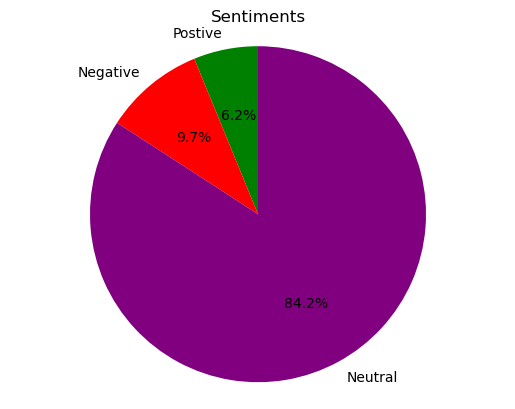

In [444]:
# Data for the pie chart
labels = ['Postive','Negative','Neutral']
sizes = [pos,neg,neu]  # The values should add up to 100
colors = ['green', 'red', 'purple']

# Plot the pie chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Sentiments')

# Show the plot
plt.show()

In [445]:
def sentimentcall():
    if pos > 1.5*neg :
        print("BUY THE STOCK!!!!!!!!")
    elif neg>1.5*pos:
        print("SELL THE STOCK!!!!!!!!")
    else:
        print("HOLD THE STOCK!!!!!!")

In [446]:
sentimentcall()

SELL THE STOCK!!!!!!!!


# **Step 3.5: Training and Testing the Models for Stock Price/Performance Analysis**

In [209]:
# Separate features (X) and target variable (y) from the DataFrame
X = new_hybrid.drop('Label', axis=1) # Features (independent variables)   

y = new_hybrid['Label']  # Target variable (dependent variable)

In [210]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
# Splitting the data into training and testing sets


In [211]:
# Check if there are any NaN values in the training features (x_train)
np.any(np.isnan(x_train)) 

False

In [212]:
# Check if there all are any finite values 
np.all(np.isfinite(x_train)) 

True

In [213]:
# Fill missing values in the training features (x_train) with the mean of each column
x_train = x_train.fillna(x_train.mean())

In [214]:
x_test=x_test.fillna(x_test.mean())

## **Step 3.5.1: Stock Price/Performance analysis using Logistic Regressor Model**

In [215]:
# Importing performance metrics and evaluation functions for classification models
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

In [216]:
logit = LogisticRegression()
logit.fit(x_train,y_train)
y_logit_pred = logit.predict(x_test)
print(accuracy_score(y_test,y_logit_pred))
print(precision_score(y_test,y_logit_pred))
print(recall_score(y_test,y_logit_pred))
print(f1_score(y_test,y_logit_pred))


0.8002114164904862
0.15384615384615385
0.011111111111111112
0.020725388601036274


## **Step 3.5.2: Stock Price/Performance analysis using Random Forest Model**

In [217]:
rf = RandomForestClassifier(n_estimators=200)
rf.fit(x_train,y_train)
y_rf_pred = rf.predict(x_test)
print(accuracy_score(y_test,y_rf_pred))
print(precision_score(y_test,y_rf_pred))
print(recall_score(y_test,y_rf_pred))
print(f1_score(y_test,y_rf_pred))

0.8509513742071881
0.7746478873239436
0.3055555555555556
0.4382470119521912


## **Step 3.5.3 : Stock Price/Performance analysis using Decision Tree Model**

In [218]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_dt_pred = dt.predict(x_test)
print(accuracy_score(y_test,y_dt_pred))
print(precision_score(y_test,y_dt_pred))
print(recall_score(y_test,y_dt_pred))
print(f1_score(y_test,y_dt_pred))

0.7716701902748414
0.398876404494382
0.39444444444444443
0.39664804469273746


## **Step 3.5.4: Stock Price/Performance analysis using Logistic Gradient Boosting Model**

In [219]:
xgb = GradientBoostingClassifier()
xgb.fit(x_train, y_train)
y_xgb_pred = xgb.predict(x_test)
print(accuracy_score(y_test,y_xgb_pred))
print(precision_score(y_test,y_xgb_pred))
print(recall_score(y_test,y_xgb_pred))
print(f1_score(y_test,y_xgb_pred))

0.8414376321353065
0.7777777777777778
0.23333333333333334
0.35897435897435903


In [ ]:
from tensorflow.keras.layers import GRU

# Build the CNN + GRU Hybrid Model for Time-Series
model = Sequential()

# CNN Layer for feature extraction from time-series
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(time_steps, features)))
model.add(MaxPooling1D(pool_size=2))

# GRU Layer for capturing temporal patterns
model.add(GRU(64))

# Fully connected layer for prediction
model.add(Dense(1))  # Output for regression (e.g., predicting next time step)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))

In [220]:
print("Accuracy of Logistic Regression Model: ",accuracy_score(y_test,y_logit_pred)*100,"%")
print("Accuracy of Random forest Model      : ",accuracy_score(y_test,y_rf_pred)*100,"%")
print("Accuracy of Decision Tree Model      : ",accuracy_score(y_test,y_dt_pred)*100,"%")
print("Accuracy of Gradient Boosting Model  : ",accuracy_score(y_test,y_xgb_pred)*100,"%")

Accuracy of Logistic Regression Model:  80.02114164904862 %
Accuracy of Random forest Model      :  85.09513742071881 %
Accuracy of Decision Tree Model      :  77.16701902748414 %
Accuracy of Gradient Boosting Model  :  84.14376321353065 %


# **Conclusion:**

Here, I have used six different Neural Network models to carry out the analysis and prediction of stock price/performance and train them with Hybrid data generated from Numerical data (i.e. Last 17 years Stock price/performance records of TCS (Tata Consultancy Service)) and Textual data (i.e.India News Headlines data). 

WI have found accuracy of  each model as mention below:


Accuracy of Logistic Regression Model:  80.02114164904862 %
Accuracy of Random forest Model      :  85.20084566596195 %
Accuracy of Decision Tree Model      :  77.48414376321352 %
Accuracy of Gradient Boosting Model  :  84.14376321353065 %

 At the end, we can clearly see that Random forest Model gives more accuracy(i.e. 85.2%)  as compared to all other models.Random forest Model has 85.2% accuracy which means it performs better  on Analysis and prediction of Stock price/performance than other 3 Neural Network Models.